# MACHINE LEARNING

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Installation

In [2]:
pip install apyori         #ARM


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prophet        #TimeSeries


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-surprise #SVD


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
pip install autoviz        #report


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [6]:
import numpy as np
import pandas as pd

### visualization libraries

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
!pip install ydata-profiling



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import ydata_profiling
from ydata_profiling import ProfileReport

### ModelSelection

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

### Supervised Learning Regression models 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

### Regression models metrics

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve

### Supervised Learning classifiaction models 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### classification models metrics

In [14]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### feature Selection

In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

### multicolinearity

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### unsupervised Learning 

In [17]:
# Kmean clustering 
from sklearn.cluster import KMeans
# Hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture 
from scipy.cluster.hierarchy import dendrogram, linkage
# Association rule learning
from apyori import apriori
#The Apriori algorithm is one of the most widely used algorithms for association rule mining
# DimensionReduction
from sklearn.decomposition import PCA    # Principal component analysis   
#SVD singular value decomposition

In [18]:
# TimeSeries
from prophet import Prophet
# Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### **`NETFLIX Recommendation System Project`**

#### **SVD** `(singular value decomposition)`

- The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). 
- In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. 
- The elements of this matrix are the ratings that are given to items by users.

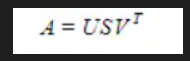

- SVD has some fascinating algebraic characteristics and conveys relevant geometrical and theoretical insights regarding linear transformations.
- SVD has some critical applications in data science too.
- Mathematical applications of the SVD involve calculating the matrix approximation, rank of a matrix and so on.
- The SVD is also greatly useful in science and engineering.
- It has some applications of statistics, for example, least-squares fitting of data and process control.

- SVD has some fascinating algebraic characteristics and conveys relevant geometrical and theoretical insights regarding linear transformations.
- SVD has some critical applications in data science too.
- Mathematical applications of the SVD involve calculating the matrix approximation, rank of a matrix and so on.
- The SVD is also greatly useful in science and engineering.
- It has some applications of statistics, for example, least-squares fitting of data and process control.

###### **`Movies Datasets`**

In [19]:
df_Movies = pd.read_csv("~/Desktop/Netflix Movie Recommendation/movies.csv")

In [20]:
df_Movies.shape

(27278, 3)

In [21]:
df_Movies.size

81834

In [22]:
df_Movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [23]:
df_Movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [24]:
df_Movies.duplicated().sum()

0

###### **`Rating Datasets`**

In [25]:
df_Rating = pd.read_csv("~/Desktop/Netflix Movie Recommendation/ratings.csv")

In [26]:
df_Rating.shape

(1048575, 4)

In [27]:
df_Rating.size

4194300

In [28]:
df_Rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

###### **`Merge Datasets`**

In [29]:
df_merge=pd.merge(df_Rating,df_Movies, on=['movieId'])

In [30]:
df_merge.shape

(1048575, 6)

In [31]:
df_merge.size

6291450

In [32]:
df_merge.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy


In [33]:
df_merge.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [34]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
 4   title      1048575 non-null  object 
 5   genres     1048575 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB


# 1. Find out the list of most popular and liked genre

In [35]:
df_merge.groupby('genres')['rating'].sum().sort_values(ascending=False).head(1)
# answer - Drama

genres
Drama    280760.0
Name: rating, dtype: float64

# 2.Create Model that finds the best suited Movie for one user in every genre.

In [36]:
from ydata_profiling import ProfileReport

In [37]:
ProfileReport(df_merge)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  3.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [39]:
AV = AutoViz_Class()

In [40]:
df_merge.to_csv('merged_dataframe.csv', index=False)

In [41]:
report = AV.AutoViz('merged_dataframe.csv')

    max_rows_analyzed is smaller than dataset shape 1048575...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        No variables removed since no ID or low-information va

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
userId,int64,0.000000,4,1.000000,7120.000000,No issue
movieId,int64,0.000000,6,1.000000,129354.000000,Column has 16940 outliers greater than upper bound (10396.62) or lower than lower bound(-4796.38). Cap them or remove them.
rating,float64,0.000000,NA,0.500000,5.000000,Column has 6973 outliers greater than upper bound (5.50) or lower than lower bound(1.50). Cap them or remove them.
timestamp,int64,0.000000,94,825499934.000000,1427752554.000000,No issue
title,object,0.000000,6,,,No issue
genres,object,0.000000,0,,,Possible high cardinality column with 888 unique values: Use hash encoding or text embedding to reduce dimension.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/shasshanksingh/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_

Could not draw wordcloud plot for title. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for genres. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 128 seconds 

 ###################### AUTO VISUALIZATION Completed ########################



##### `DQ Isuue`

In [42]:
#count the inactive users
#find count of ratings done by each user, find the range and remove the ones below the range
user_rating_count=df_merge.groupby('userId').count()["movieId"]
print("Min=",user_rating_count.min(),"-Max=",user_rating_count.max())
Q3=np.quantile(user_rating_count,0.75)
Q1=np.quantile(user_rating_count,0.25)
IQR=Q3-Q1
print("Q1=",Q1,"-Q3=",Q3)
lower_range = Q1 - (1.5*IQR)
upper_range = Q3 + (1.5*IQR)
print("lower_range=",lower_range,"-upper_range=",upper_range)

Min= 20 -Max= 2711
Q1= 35.0 -Q3= 161.0
lower_range= -154.0 -upper_range= 350.0


In [43]:
Q3_rating=np.quantile(df_merge.rating,0.75)
Q1_rating=np.quantile(df_merge.rating,0.25)
IQR_rating=Q3_rating-Q1_rating
lower_range_rating = Q1_rating - (1.5*IQR_rating)
upper_range_rating = Q3_rating + (1.5*IQR_rating)
print("lower_range=",lower_range_rating,"-upper_range=",upper_range_rating)

#remove items outside of range
remove_list = df_merge[(df_merge.rating<lower_range_rating) | (df_merge.rating>upper_range_rating)].index
df_merge.drop(remove_list,inplace=True)
print(df_merge.shape)

lower_range= 1.5 -upper_range= 5.5
(1000199, 6)


In [44]:
Q3_movieId=np.quantile(df_merge.movieId,0.75)
Q1_movieId=np.quantile(df_merge.movieId,0.25)
IQR_movieId=Q3_movieId-Q1_movieId
lower_range_movieId = Q1_movieId - (1.5*IQR_movieId)
upper_range_movieId = Q3_movieId + (1.5*IQR_movieId)
print("lower_range=",lower_range_movieId,"-upper_range=",upper_range_movieId)

#remove items outside of range
remove_list = df_merge[(df_merge.rating<lower_range_rating) & (df_merge.rating>upper_range_rating)].index
df_merge.drop(remove_list,inplace=True)
print(df_merge.shape)

lower_range= -4711.5 -upper_range= 10260.5
(1000199, 6)


In [45]:
!pip install scikit-surprise


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [46]:
#from sklearn.model_selection import cross_validate
from surprise.model_selection import cross_validate
from surprise import SVD,Reader, Dataset

In [47]:
from sklearn.decomposition import PCA

In [48]:
#1 Load Reader library
reader = Reader()

In [49]:
df_merge.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [50]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000199 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1000199 non-null  int64  
 1   movieId    1000199 non-null  int64  
 2   rating     1000199 non-null  float64
 3   timestamp  1000199 non-null  int64  
 4   title      1000199 non-null  object 
 5   genres     1000199 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 53.4+ MB


In [51]:
# print(df_merge['timestamp'].dtype)

In [52]:
 df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'])

In [53]:
num_cols = df_merge.select_dtypes(include = ['int64','float64']).columns

In [54]:
# data = Dataset.load_from_df(df_merge[['userId','movieId','rating']][:50000],reader)

In [55]:
#2 get just top 100K rows for faster run time
data  = Dataset.load_from_df(df_merge[num_cols][:100000],reader)

In [56]:
#3 Use the SVD algorithm.
svd = SVD()

In [57]:
cross_validate(svd,data,measures=['RMSE', 'MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7406  0.7499  0.7420  0.7507  0.7496  0.7466  0.0043  
MAE (testset)     0.5882  0.5962  0.5880  0.5952  0.5959  0.5927  0.0037  
Fit time          0.41    0.44    0.41    0.43    0.41    0.42    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([0.74059823, 0.74987437, 0.74200001, 0.75067307, 0.74964675]),
 'test_mae': array([0.58824238, 0.59615868, 0.58802355, 0.59515963, 0.59590908]),
 'fit_time': (0.4056880474090576,
  0.44431209564208984,
  0.4110078811645508,
  0.42870283126831055,
  0.4068300724029541),
 'test_time': (0.0334467887878418,
  0.033476829528808594,
  0.03297686576843262,
  0.03251934051513672,
  0.03317403793334961)}

In [58]:
# SVD algorithm has an average RMSE of approximately  0.7478  and an average MAE of approximately 0.5935 across the 5 folds, with low standard deviations, indicating consistent performance.

In [59]:
#Find all movies rated as 5 by user 7066
dataset_10= df_merge[(df_merge['userId'] == 10) & (df_merge['rating'] == 5)]
dataset_10.head(5) 

,userId,movieId,rating,timestamp,title,genres
76127,10,1387,5.0,1970-01-01 00:00:00.943497376,Jaws (1975),Action|Horror
179028,10,858,5.0,1970-01-01 00:00:00.943497439,"Godfather, The (1972)",Crime|Drama
196255,10,1221,5.0,1970-01-01 00:00:00.943497502,"Godfather: Part II, The (1974)",Crime|Drama
200697,10,1247,5.0,1970-01-01 00:00:00.943497554,"Graduate, The (1967)",Comedy|Drama|Romance
410395,10,527,5.0,1970-01-01 00:00:00.943497122,Schindler's List (1993),Drama|War


In [60]:
# Create a shallow copy for the movies dataset
user_10 = df_merge.copy()

user_10 = user_10.reset_index()


# getting full dataset
data = Dataset.load_from_df(df_merge[['userId', 'movieId', 'rating']], reader)

In [61]:
#Predict the ratings for user_7066
user_10['Estimate_Score'] = user_10['movieId'].apply(lambda x: svd.predict(10, x).est)

# Sort predicted ratings for user_7066 in descending order
user_10 = user_10.sort_values('Estimate_Score', ascending=False)

#Print top 5 recommendations
print(user_10.head(5))

       index  userId  movieId  rating           timestamp            \
45424  46326   5006    1136      4.0  1970-01-01 00:00:01.242831041   
44847  45739   2496    1136      4.0  1970-01-01 00:00:01.182916381   
44837  45729   2444    1136      5.0  1970-01-01 00:00:01.093552477   
44838  45730   2451    1136      3.0  1970-01-01 00:00:00.884177217   
44839  45731   2455    1136      5.0  1970-01-01 00:00:00.954509816   

                       title                            genres           \
45424  Monty Python and the Holy Grail (1975)  Adventure|Comedy|Fantasy   
44847  Monty Python and the Holy Grail (1975)  Adventure|Comedy|Fantasy   
44837  Monty Python and the Holy Grail (1975)  Adventure|Comedy|Fantasy   
44838  Monty Python and the Holy Grail (1975)  Adventure|Comedy|Fantasy   
44839  Monty Python and the Holy Grail (1975)  Adventure|Comedy|Fantasy   

       Estimate_Score  
45424     4.260844     
44847     4.260844     
44837     4.260844     
44838     4.260844     
44

In [62]:
svd.predict(10, 318).est

4.139494252409775

In [63]:
svd.predict(712664, 318).est

4.522166892215211

In [64]:
movies_10 = user_10.groupby('genres').agg(max_rating=('Estimate_Score',np.max)).sort_values('max_rating',ascending=False).head(5)
movies_10


,max_rating
genres,
Adventure|Comedy|Fantasy,4.260844
Action|Sci-Fi|Thriller,4.209838
Action|Adventure|Sci-Fi,4.173678
Crime|Drama,4.139494
Drama,4.125350


In [65]:
user_10[user_10['Estimate_Score'].isin(movies_10.max_rating)].groupby('title').head(1)

,index,userId,movieId,rating,timestamp,title,genres,Estimate_Score
45424,46326,5006,1136,4.0,1970-01-01 00:00:01.242831041,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.260844
26886,27448,4677,541,4.0,1970-01-01 00:00:01.053970299,Blade Runner (1982),Action|Sci-Fi|Thriller,4.209838
47528,48444,245,1196,4.0,1970-01-01 00:00:00.939688957,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Sci-Fi,4.173678
23076,23504,6823,318,4.0,1970-01-01 00:00:00.865339860,"Shawshank Redemption, The (1994)",Crime|Drama,4.139494
46233,47139,1378,1193,5.0,1970-01-01 00:00:00.905103278,One Flew Over the Cuckoo's Nest (1975),Drama,4.125350


# 3. Find what Genre Movies have received the best and worst ratings based on User Rating.